<a href="https://colab.research.google.com/github/EduardoAve/Data-science-projects/blob/main/univariate_analysis_labour_wellbeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Univariado sobre el Ingreso en EUR de Trabajadores de Educación Superior en Austria y República Checa

### Eduardo José Avendaño Caicedo  
### Sebastián Dow Valenzuela

---

## Análisis Exploratorio de Datos

### PhD. Jose Armando Ordóñez  
### MSc en Ciencia de Datos

### Universidad Icesi
### 1 de marzo de 2025


#Descripción del conjunto de datos

El conjunto de datos contiene información sobre los ingresos laborales en universidades de Austria y República Checa. Para el análisis univariado se seleccionó la columna "Income EUR" (Ingreso en EUR).

---

# Jusitificación de la elección de la variable de Ingreso en EUR

Se escogió esta variable debido a que deberá ser incluida en el análisis cuando se vaya a llevar a cabo la modelación. Adicionalmente, presenta más variablidad que otras variables y es una variable cuantitativa.

In [1]:
# Importación de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive #no utilizaremos importaciones desde google drive

In [2]:
# Lectura del conjunto de datos

url = 'https://raw.githubusercontent.com/EduardoAve/Data-science-projects/refs/heads/main/dataExample.csv'
#url = 'https://raw.githubusercontent.com/EduardoAve/Data-science-projects/refs/heads/main/academic_data.csv' #Esta es otra variante del conjunto de datos que quisimos probar
df = pd.read_csv(url)

# Información del campo "Income EUR" en el dataframe

In [3]:
# Información sobre la variable "Income EUR"
display(df['Income EUR'].info())
display(df['Income EUR'].describe())
print(df['Income EUR'].dtypes)

<class 'pandas.core.series.Series'>
RangeIndex: 2748 entries, 0 to 2747
Series name: Income EUR
Non-Null Count  Dtype  
--------------  -----  
2429 non-null   float64
dtypes: float64(1)
memory usage: 21.6 KB


None

,Income EUR
count,2429.000000
mean,4251.711647
std,10588.861200
min,0.000000
25%,1458.090318
50%,2100.000000
75%,3700.000000
max,130000.000000


float64


# Histograma del Ingreso en EUR

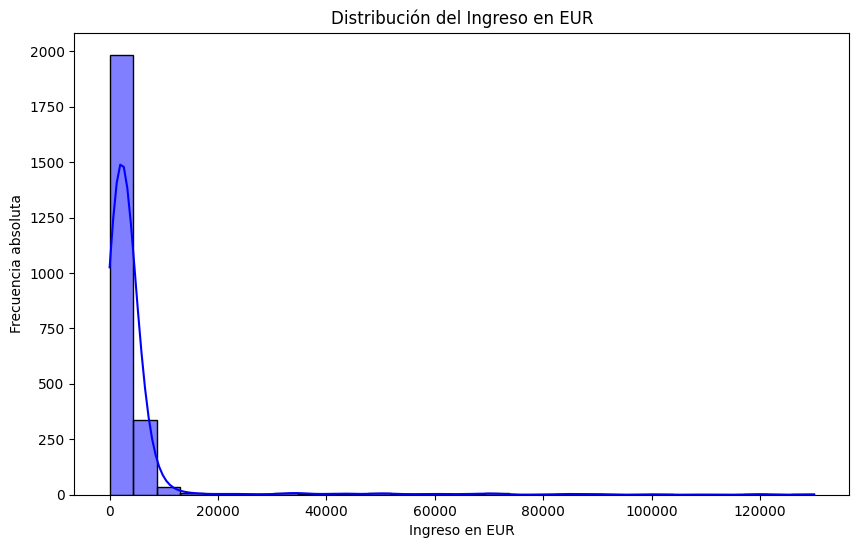

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income EUR'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribución del Ingreso en EUR')
plt.xlabel('Ingreso en EUR')
plt.ylabel('Frecuencia absoluta')
plt.show()

No se ve claramente una distribución para esta variable aleatorioa, sin embargo, se logra notar una gran dispersión en los datos.

Podemos observar como la mayoría de registros se encuentran entre 0 y 20000, sin embargo, existen otros tantos que excenden por mucho estos valores como es el caso del valor máximo de 130000.

# Boxplot del ingreso en EUR

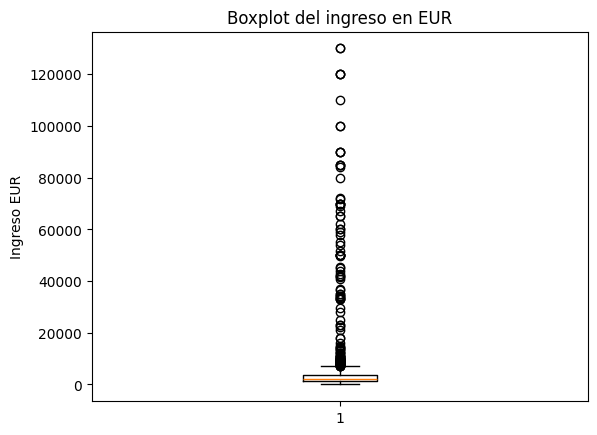

In [5]:
# Nuevo dataframe sin valores faltantes
df['Income EUR'] = pd.to_numeric(df['Income EUR'], errors='coerce')
df_filtered = df.dropna(subset=['Income EUR'])

# Boxplot de 'Income EUR'
plt.boxplot(df_filtered["Income EUR"])
plt.ylabel("Ingreso EUR")
plt.title("Boxplot del ingreso en EUR")
plt.show()

El diagrama de cajas nos permite una mejor visualización de los datos atípicos que existen en esta columna. Podemos observar que hay muchos datos que superan por creces el valor de la desviación estándar (10588).

Estadísticos de dispersión y conteo de valores faltantes

In [6]:
# Calcular la desviación estándar, varianza y rango de 'Income EUR'
print("Desviación estándar:", df_filtered["Income EUR"].std())
print("Varianza:", df_filtered["Income EUR"].var())
print("Rango:", df_filtered["Income EUR"].max() - df_filtered["Income EUR"].min())

# Ver el número de valores faltantes en la columna 'Income EUR' del df original
print("Valores faltantes:", df["Income EUR"].isnull().sum())

Desviación estándar: 10588.861200019166
Varianza: 112123981.51327133
Rango: 130000.0
Valores faltantes: 319


#Conclusiones del análisis de la variable 'Income EUR'

- Alta Variabilidad en los Datos:
Se observa una amplia dispersión en los valores de "Income EUR", lo cual indica que existen diferencias significativas en los salarios reportados.
- Subgrupos en la Población:
La variabilidad podría estar explicada por la existencia de subgrupos dentro de la muestra, por ejemplo, docentes que se dedican exclusivamente a la enseñanza versus aquellos que combinan su labor académica con trabajos en la industria. Este hecho sugiere que los salarios varían en función del rol y las responsabilidades adicionales.
- Posibles Errores de Registro:
La dispersión también podría deberse a inconsistencias en la forma en que se reportaron los salarios. Es factible que algunos participantes hayan ingresado su salario anual en lugar del salario mensual, lo que afecta la comparabilidad de los datos.
- Implicaciones para el Análisis Posterior:
Es recomendable realizar una limpieza y verificación adicional de los datos para identificar y corregir posibles errores o outliers. Esto puede incluir la revisión de la escala (mensual vs. anual) y la segmentación de la muestra para analizar de forma separada los diferentes subgrupos.